# Проект: классификация

In [308]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')


## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [309]:
df = pd.read_csv('./data/bank_fin.csv', sep=';')


In [310]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [311]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


---

Данные о клиентах банка:

• age (возраст);

• jоb (сфера занятости);

• marital (семейное положение):

• education (уровень образования);

• default (имеется ли просроченный кредит):

• housing (имеется ли кредит на жильё);

• loan (имеется ли кредит на личные нужды):

• balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

• contact (тип контакта с клиентом);

• month (месяц, в котором был последний контакт);

• day (день, в который был последний контакт);

• duration (продолжительность контакта в секундах).

Прочие признаки:

• campaian (количество контактов с этим клиентом в течение текушей кампании):

• pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании):

• previous (количество контактов до текущей кампании)

• poutcome (результат прошлой маркетинговой кампании).

---

In [312]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.isnull().sum()


age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

---

### Задание 2

In [313]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'{i}: {df[i].unique()}')


job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
balance: [' 2 343,00 $ ' ' 45,00 $ ' ' 1 270,00 $ ' ... ' 1 594,00 $ '
 ' 2 593,00 $ ' '-134,00 $ ']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'other' 'failure' 'success']
deposit: ['yes' 'no']


---

### Задание 3

In [314]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.replace('$', '')
df['balance'] = df['balance'].str.replace(',', '.')
df['balance'] = df['balance'].str.strip()
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = pd.to_numeric(df['balance'])


In [315]:
np.mean(df['balance']).round(3)


1529.129

---

### Задание 4

In [316]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'] = df['balance'].fillna(df['balance'].median())


In [317]:
np.mean(df['balance']).round(3)


1526.936

---

### Задание 5

In [318]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['job'] = df['job'].str.replace('unknown', df['job'].mode()[0])
df['education'] = df['education'].str.replace(
    'unknown', df['education'].mode()[0])


In [319]:
# После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования
# (т.е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-
mask1 = df['job'].mode()[0]
mask2 = df['education'].mode()[0]

np.mean(df[(df['job'] == mask1) & (df['education'] == mask2)]
        ['balance']).round(3)


1598.883

---

### Задание 6

In [320]:
# удалите все выбросы для признака balance
# ваш код
def outliers_iqr(data, feature, left_iqr=1.5, right_iqr=1.5, log_scale=False):
    """Function for finding outliers by Tukey method with adjustment option for iqr's multiplier.

    Args:
        data (DataFrame): DataFrame which will be used to find outliers.
        feature (string): Name of a column in DF which will be inspected for outliers.
        left_iqr (float, optional): lower boundary multiplier. Defaults to 1.5.
        right_iqr (float, optional): upper boundary multiplier. Defaults to 1.5.
        log_scale (bool, optional): converting data in logarithmic representation in case of lognormal destribution of
        original data. Defaults to False.

    Returns:
        DataFrame: returns two copies of the original DataFrame contain DF's with outliers and cleaned data.
    """    ''''''

    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]

    quartile1, quartile3 = x.quantile(0.25), x.quantile(0.75)

    iqr = quartile3 - quartile1

    lower_bound = round(quartile1 - (iqr*left_iqr))

    upper_bound = round(quartile3 + (iqr*right_iqr))

    outliers = data[(x < lower_bound) | (x > upper_bound)]

    cleaned = data[(x > lower_bound) & (x <= upper_bound)]

    print(f'Number of outliers by Tukey\'s method: {outliers.shape[0]}')
    print(f'Resulting number of lines cleared of outliers: {cleaned.shape[0]}')
    print(f'lower_bound: {lower_bound}')
    print(f'upper_bound: {upper_bound}')

    return outliers, cleaned


_, df_cleaned = outliers_iqr(df, 'balance')


Number of outliers by Tukey's method: 1057
Resulting number of lines cleared of outliers: 10105
lower_bound: -2241
upper_bound: 4063


---

## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64


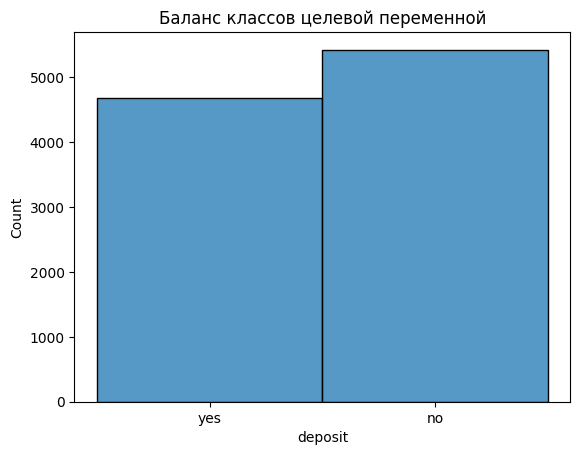

In [321]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
sns.histplot(df_cleaned['deposit']).set(
    title='Баланс классов целевой переменной')
print(df_cleaned['deposit'].value_counts())


---

### Задания 2 и 3

In [322]:
# рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
# ваш код
data = df_cleaned.copy()
data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


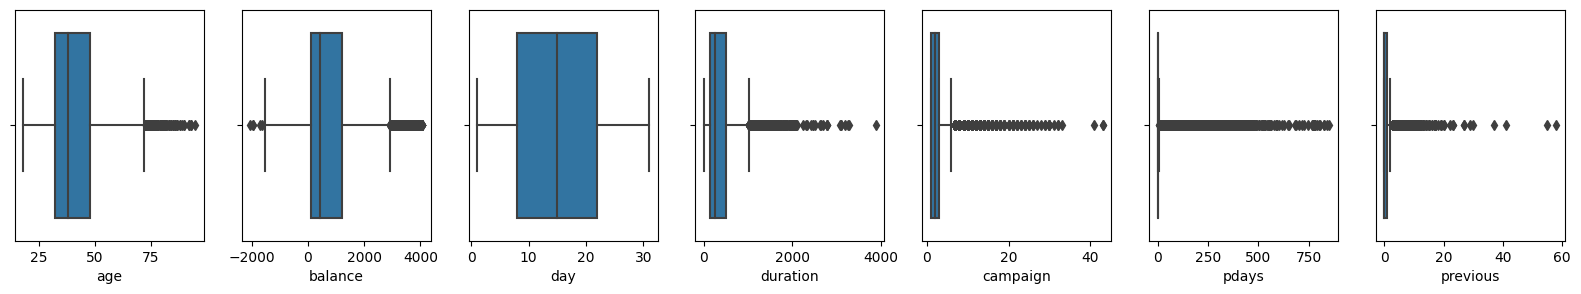

In [323]:
fig, axes = plt.subplots(1, len(data.describe().columns), figsize=(20, 3))

for i, j in enumerate(data.describe().columns):
    sns.boxplot(data=data, x=j, ax=axes[i])


> Нужно в дальнейшем исследовать на выбросы фиты баланс и возраст, т.к. выбросы по остальным фитам не являются фактическими выбросами

---

### Задания 4 и 5

In [324]:
# рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
# ваш код
# постройте визуализации, иллюстрирующие результаты
data = df_cleaned.copy()
data.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


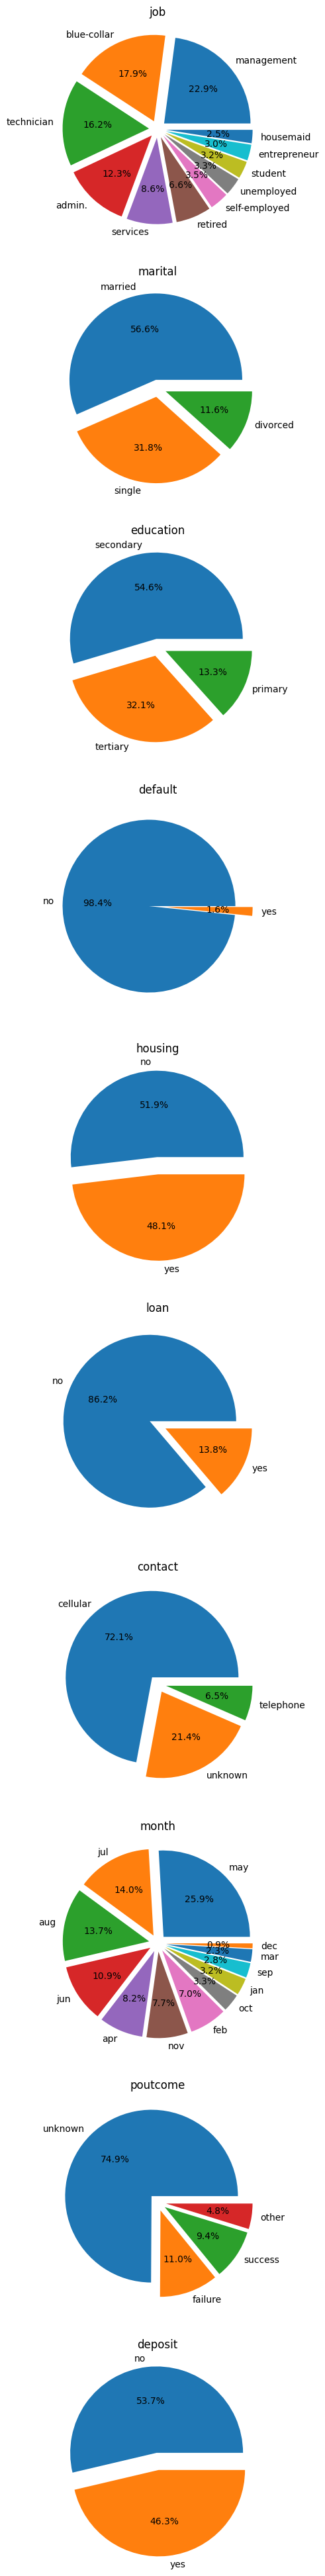

In [325]:
graphs = data.describe(include='object').columns.to_list()

fig, axes = plt.subplots(
    len(data.describe(include='object').columns), 1, figsize=(100, 50))

for i, j in enumerate(graphs):
    labels = data[j].value_counts().index.to_list()
    axes[i].pie(
        x=data[j].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        explode=[0.1 for i in data[j].value_counts()])
    axes[i].set_title(f'{j}')


---

### Задание 6

In [326]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
data.groupby('poutcome')['deposit'].value_counts().unstack()


deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


---

### Задание 7

In [327]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
data.groupby('month', sort=False)['deposit'].value_counts()


month  deposit
may    no         1776
       yes         841
jun    no          606
       yes         498
jul    no          836
       yes         582
aug    no          775
       yes         610
oct    yes         273
       no           62
nov    no          456
       yes         324
dec    yes          84
       no            9
jan    no          194
       yes         125
feb    yes         386
       no          323
mar    yes         213
       no           24
apr    yes         513
       no          317
sep    yes         232
       no           46
Name: deposit, dtype: int64

---

### Задание 8

Нам бы очень хотелось посмотреть, люди какого возраста чаще открывают депозиты, а какого - реже.
Однако, так как возрастной разброс достаточно большой, визуализация для всех возрастов или нахождение
статистики для каждого возраста не будет содержательным. В аналитике принято разделять людей по
возрастным подгруппам и делать выводы уже по ним.
Создайте новую переменную, в которой будет находиться индикатор принадлежности к одной из
следующих категорий:

• '<30';

• 30-40°:

• '40-50';

• '50-60'

• '60+'.

In [328]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# создадим новую переменную с индикатором возрастной категории
data['age_category'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 100], labels=[
                              '<30', '30-40', '40-50', '50-60', '60+'])


deposit,no,yes
age_category,,
<30,819,1051
30-40,2215,1627
40-50,1360,895
50-60,933,692
60+,97,416


<AxesSubplot: xlabel='age_category'>

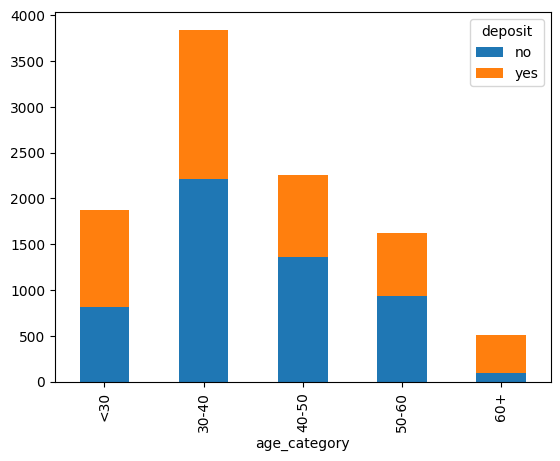

In [329]:
# построим диаграмму
display(data.groupby('age_category')['deposit'].value_counts().unstack())
data.groupby('age_category')['deposit'].value_counts(
).unstack().plot(kind='bar', stacked=True)


> Более склонными к открытию депозита являются люди из возрастных групп:
* < 30 лет

* \> 60 лет

---

### Задания 9 и 10

Давайте посмотрим, как зависит соотношение успешных и неуспешных контактов с клиентами от
категорий, к которым относятся клиенты:

• семейное положение;

• уровень образования:

• сфера занятости.

Постройте визуализации, отражающие количество тех, кто открыл депозит, и тех, кто его не открыл, для
всех категорий предложенных выше трёх признаков. Постарайтесь оформить диаграммы максимально
наглядно и описать полученный результат.
К каким категориям относится большая часть людей? Среди каких групп населения есть тенденция
соглашаться открывать депозит, а среди каких - отказываться?

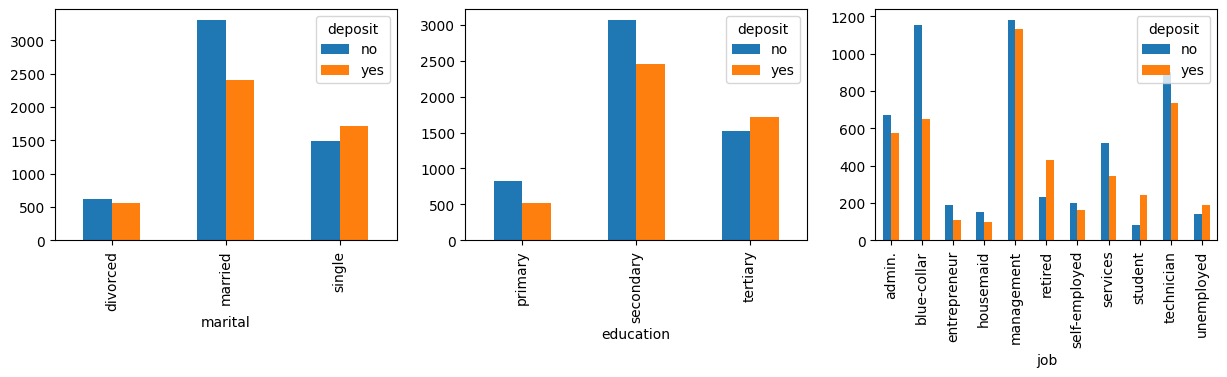

In [330]:
param_list = ['marital', 'education', 'job']
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for i, j in enumerate(param_list):
    data.groupby(j)['deposit'].value_counts(
    ).unstack().plot(kind='bar', ax=axes[i])


> Наибольшее число клиентов банка содержится в круппах:

* marital status - maried

* education - secondary

* job - managment

> При этом тенденция открывать счет в банке, а не отказываться от чаще встречается в группах:

* marital status - single

* education - tertiary

* job - unemployed


---

### Задание 11

В предыдущих заданиях мы посмотрели различные категории отдельно. Но что будет, если посмотреть на
пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием
или разведённых с более низким уровнем образования?

Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части
постройте сводную диаграмму по уровню образования и семейному положению. Представьте результаты в
виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для
неоткрывших? Какой вывод вы можете сделать, исходя из полученных данных?

In [331]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
# (если рассматривать тех, кто открыл депозит)

data_pivot = pd.pivot_table(
    data=data[data['deposit'] == 'yes'],
    values='deposit',
    index='marital',
    columns='education',
    aggfunc='count'
)
data_pivot


education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


---

## Часть 3: преобразование данных

### Задание 1

In [332]:
# преобразуйте уровни образования
le_ed = LabelEncoder()
encoded_ed = le_ed.fit_transform(data['education'])

data['education'] = encoded_ed.tolist()
display(data['education'].sum())


11995

---

### Задания 2 и 3

In [333]:
# преобразуйте бинарные переменные в представление из нулей и единиц
le_age = LabelEncoder()
encoded_age = le_age.fit_transform(data['age_category'])

data['age_category'] = encoded_age.tolist()


In [334]:
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [335]:
data['deposit'].std().round(3)


0.499

In [336]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)


In [337]:
(data['default'].mean() + data['housing'].mean() + data['loan'].mean()).round(3)


0.635

---

### Задание 4

In [338]:
# создайте дамми-переменные
data = pd.get_dummies(
    data=data, columns=['job', 'marital', 'contact', 'month', 'poutcome']
)


In [339]:
print(f'{len(data.columns)} признаков + 5 признаков которые\
    были изменены на месте в предыдущих заданиях - 1 признак\
        целевой итого: {len(data.columns)+4}')


46 признаков + 5 признаков которые    были изменены на месте в предыдущих заданиях - 1 признак        целевой итого: 50


---

### Задания 5 и 6

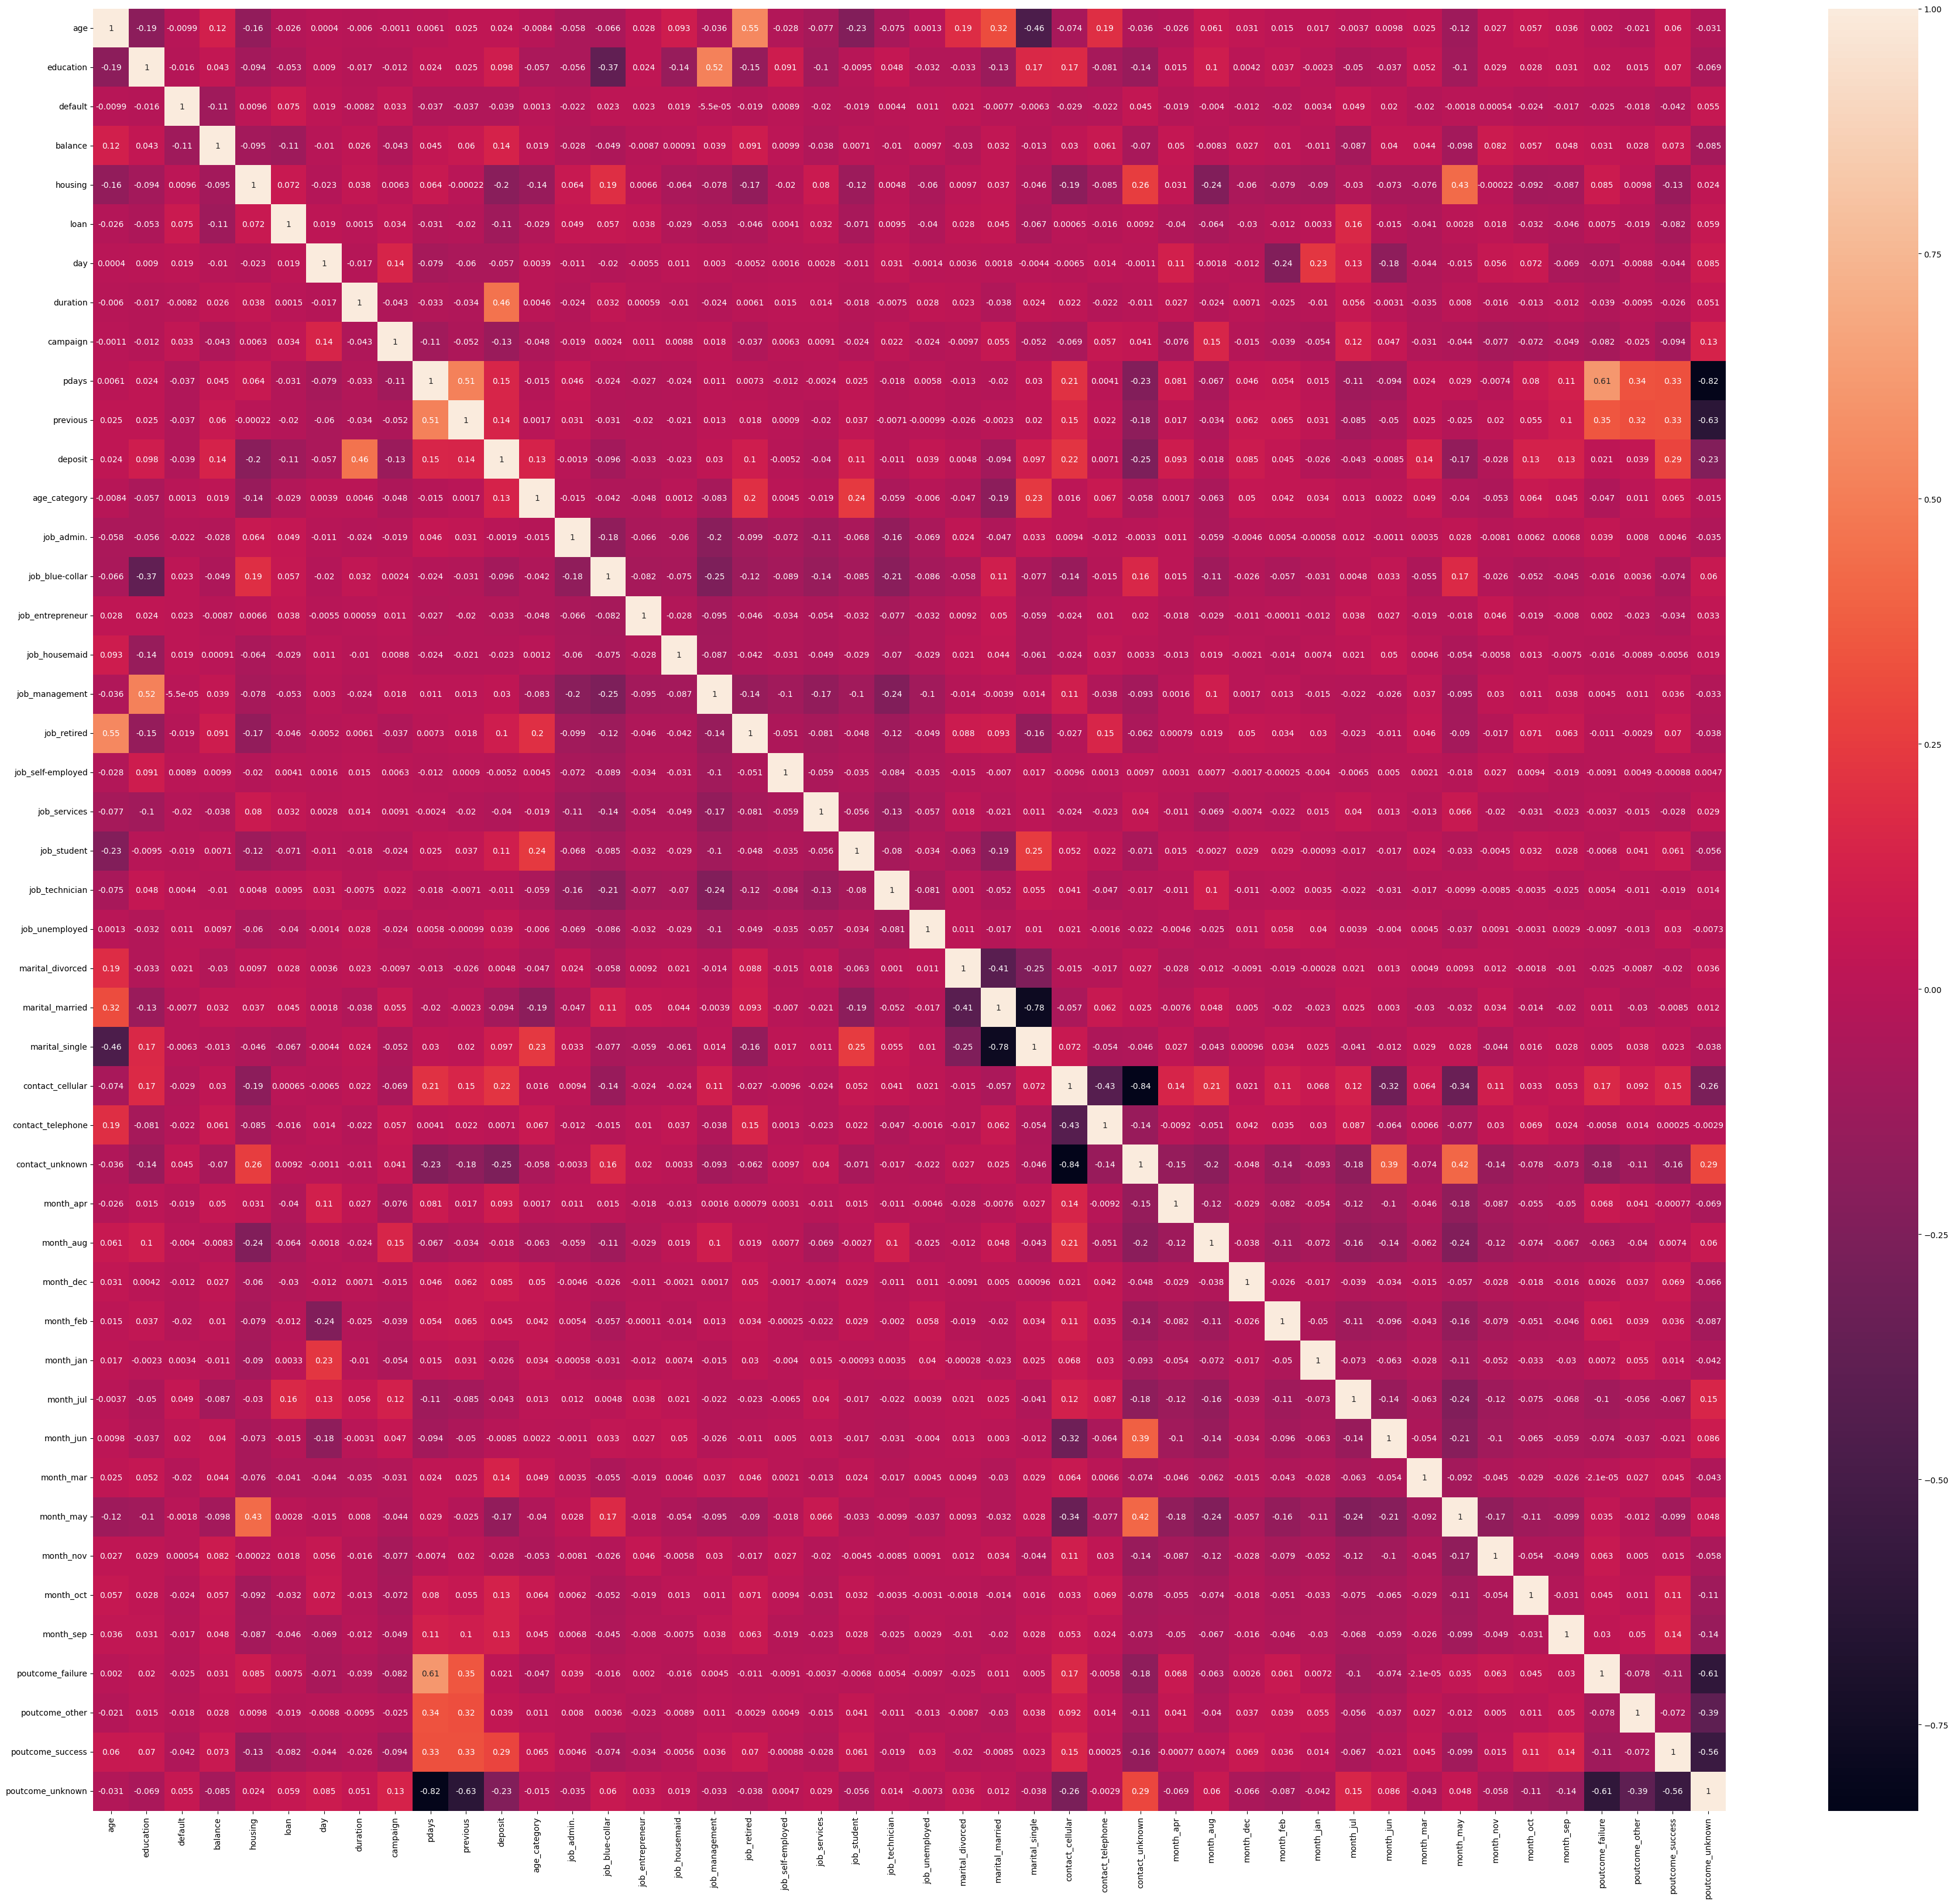

In [340]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
heatmap = sns.heatmap(data.corr(), annot=True,
                      xticklabels=True, yticklabels=True)
heatmap.figure.set_size_inches(45, 40)


---

### Задания 7 и 8

In [341]:
X = data.drop(['deposit'], axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.33)


In [342]:
# рассчитайте необходимые показатели
X_test.shape


(3335, 45)

In [343]:
y_test.mean().round(2)


0.46

---

### Задание 9

In [344]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(k=15)
selector.fit(X_train, y_train)

mvp_feats = selector.get_feature_names_out().tolist()
print(mvp_feats)


['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous', 'age_category', 'contact_cellular', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


In [345]:
exclude_list = ['month_mar', 'month_may',
                'month_oct', 'month_sep', 'month_jan']

for feat in exclude_list:
    if feat not in mvp_feats:
        print(feat)


month_jan


---

### Задание 10

In [346]:
# нормализуйте данные с помощью minmaxsxaler
scaller = preprocessing.MinMaxScaler()
scaller.fit(X_train[mvp_feats])
X_train_scaled = pd.DataFrame(scaller.transform(
    X_train[mvp_feats]), columns=X_train[mvp_feats].columns)
X_test_scaled = pd.DataFrame(scaller.transform(
    X_test[mvp_feats]), columns=X_test[mvp_feats].columns)


In [347]:
X_train_scaled.head()


,balance,housing,duration,campaign,pdays,previous,age_category,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.426374,1.0,0.131735,0.00000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346531,0.0,0.075793,0.00000,0.240936,0.034483,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.335242,1.0,0.102346,0.02381,0.419883,0.086207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.407886,0.0,0.034803,0.00000,0.120468,0.086207,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.571499,0.0,0.025264,0.00000,0.138012,0.137931,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [348]:
X_test_scaled['balance'].mean().round(2)


0.47

---

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [349]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    random_state=42,
    solver='sag',
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

print(
    f'Accuracy on test: {metrics.accuracy_score(y_test, y_pred_logreg).round(2)}')


Accuracy on test: 0.81


---

### Задания 2,3,4

In [350]:
# обучите решающие деревья, настройте максимальную глубину
desc_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

desc_tree.fit(X_train_scaled, y_train)
y_pred_desc_tree_train = desc_tree.predict(X_train_scaled)
y_pred_desc_tree = desc_tree.predict(X_test_scaled)

print(
    f'Accuracy on test:\n {metrics.classification_report(y_test, y_pred_desc_tree)}')
print(f'{"_"*60}')
print(
    f'Accuracy on test:\n {metrics.classification_report(y_train, y_pred_desc_tree_train)}')


Accuracy on test:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      1790
           1       0.73      0.72      0.73      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335

____________________________________________________________
Accuracy on test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770



Max accuracy on test: 0.81


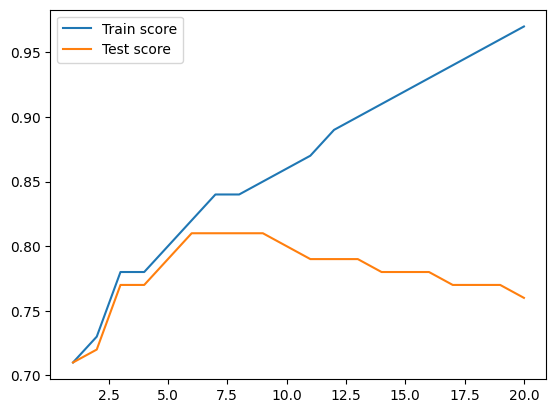

In [351]:
max_depth = [i for i in range(1, 21)]
acc_train = {}
acc_test = {}

for i in max_depth:
    opt_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42,
        max_depth=i
    )
    opt_tree.fit(X_train_scaled, y_train)
    acc_train[i] = metrics.accuracy_score(
        y_train, opt_tree.predict(X_train_scaled)).round(2)
    acc_test[i] = metrics.accuracy_score(
        y_test, opt_tree.predict(X_test_scaled)).round(2)


print(f'Max accuracy on test: {max(acc_test.values())}')
sns.lineplot(data=acc_train, label='Train score')
sns.lineplot(data=acc_test, label='Test score');


---

### Задание 5

In [352]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7, 10]
}

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
grid_search.best_score_.round(3)

y_pred = grid_search.predict(X_test_scaled)
print(
    f'f1 score with optimal params for test: {metrics.f1_score(y_test, y_pred).round(2)}')


Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 2}
f1 score with optimal params for test: 0.8


---

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [353]:
# обучите на ваших данных случайный лес
first_forest = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

first_forest.fit(X_train_scaled, y_train)

y_pred = first_forest.predict(X_test_scaled)

print(f'Recall score rfd:\n {metrics.recall_score(y_test, y_pred).round(2)}')
print(f'Accuracy score rfd:\n {metrics.accuracy_score(y_test, y_pred).round(2)}')
print((metrics.classification_report(y_test, y_pred)))

Recall score rfd:
 0.83
Accuracy score rfd:
 0.83
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



---

### Задания 2 и 3

In [354]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)

gb.fit(X_train_scaled, y_train)
y_gb_pred = gb.predict(X_test_scaled)

print(f'f1 score for gb on test: {metrics.f1_score(y_test, y_gb_pred).round(2)}')
print(metrics.classification_report(y_test, y_gb_pred))

f1 score for gb on test: 0.82
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



---

### Задание 4

In [358]:
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingClassifier

estimators = [
    ('logreg', linear_model.LogisticRegression(
        random_state=42,
        solver='sag',
        max_iter=1000,
        n_jobs=-1)),
    
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42,
    )),
    
    ('rf', ensemble.RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        min_samples_leaf=5,
        max_depth=10,
        random_state=42
        )),
    
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
    ))
]

reg = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(
        random_state=42,
        solver='sag',
        max_iter=1000,
        n_jobs=-1
    )
)

reg.fit(X_train_scaled, y_train)
y_reg_pred = reg.predict(X_test_scaled)
print(metrics.precision_score(y_test,y_reg_pred).round(2))

0.81


---

### Задание 5

In [379]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
feature_importances = gb.feature_importances_.round(2).tolist()
display(dict(zip(mvp_feats, feature_importances)))

{'balance': 0.06,
 'housing': 0.05,
 'duration': 0.51,
 'campaign': 0.01,
 'pdays': 0.06,
 'previous': 0.01,
 'age_category': 0.04,
 'contact_cellular': 0.0,
 'contact_unknown': 0.07,
 'month_mar': 0.03,
 'month_may': 0.02,
 'month_oct': 0.02,
 'month_sep': 0.01,
 'poutcome_success': 0.11,
 'poutcome_unknown': 0.0}

---

### Задания 6,7,8

In [380]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna
random_state = 42


def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

    # создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=random_state)
    # обучаем модель
    model.fit(X_train_scaled, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train_scaled))

    return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))


[I 2023-04-24 17:26:01,967] A new study created in memory with name: RandomForestClassifier
[I 2023-04-24 17:26:02,687] Trial 0 finished with value: 0.8938564952321401 and parameters: {'n_estimators': 182, 'max_depth': 29, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8938564952321401.
[I 2023-04-24 17:26:03,080] Trial 1 finished with value: 0.8433129027188433 and parameters: {'n_estimators': 129, 'max_depth': 10, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8938564952321401.
[I 2023-04-24 17:26:03,482] Trial 2 finished with value: 0.8545568039950063 and parameters: {'n_estimators': 122, 'max_depth': 12, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8938564952321401.
[I 2023-04-24 17:26:03,902] Trial 3 finished with value: 0.89157004073958 and parameters: {'n_estimators': 109, 'max_depth': 22, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8938564952321401.
[I 2023-04-24 17:26:04,523] Trial 4 finished with value: 0.8562490223682153 and parameters: {'n_es

Наилучшие значения гиперпараметров {'n_estimators': 177, 'max_depth': 25, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [382]:
model_opt = ensemble.RandomForestClassifier(**study.best_params)
model_opt.fit(X_train_scaled, y_train)

y_pred = model_opt.predict(X_test_scaled)
print(f'f1 score for test: {metrics.f1_score(y_test, y_pred).round(2)}')
print(f'f1 score for test: {metrics.accuracy_score(y_test, y_pred).round(2)}')

f1 score for test: 0.82
f1 score for test: 0.83
